In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
lung1 = pd.read_csv("drive/MyDrive/GSE87340.csv.zip")
lung2 = pd.read_csv("drive/MyDrive/GSE60052.csv.zip")
lung3 = pd.read_csv("drive/MyDrive/GSE40419.csv.zip")
lung4 = pd.read_csv("drive/MyDrive/GSE37764.csv.zip")
lung_1_4 = pd.concat([lung1, lung2, lung3, lung4])

In [31]:
print(lung_1_4.iloc[:,0:10].head())


           ID    class  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0  SRR4296063   Normal        10.728260         4.668142        10.278195   
1  SRR4296064    Tumor        11.332606         2.329988        10.127734   
2  SRR4296065   Normal         9.951182         4.264426        10.288874   
3  SRR4296066    Tumor        12.185680         2.798643        10.178582   
4  SRR4296067   Normal         9.875179         2.922071        10.444479   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0        10.184036         8.215333        11.310861        13.178872   
1        10.167900         8.174060        10.399611        13.208972   
2        10.093258         8.011385        11.814572        14.038661   
3        10.401606         8.902321        10.294009        13.170466   
4        10.435843         8.692961        12.604934        13.538341   

   ENSG00000001036  
0        11.469473  
1        11.510862  
2        11.651766  
3        11.54

In [32]:
print(lung_1_4.isna().sum())

ID                 0
class              0
ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
                  ..
ENSG00000285990    0
ENSG00000285991    0
ENSG00000285992    0
ENSG00000285993    0
ENSG00000285994    0
Length: 58737, dtype: int64


In [33]:
print(lung_1_4.isna().sum().sum())


0


In [34]:
df=lung_1_4['class'].value_counts().reset_index()

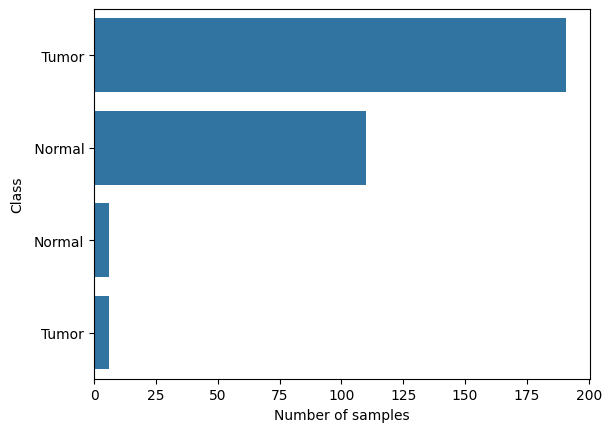

In [35]:
sns.barplot(x = "class", y = "index", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [36]:
print(set(lung_1_4['class']))


{'Normal', 'Tumor', ' Normal', ' Tumor'}


In [37]:
lung_1_4['class']=lung_1_4['class'].replace(' Normal', 'Normal')
lung_1_4['class'] = lung_1_4['class'].replace(' Tumor', 'Tumor')


In [38]:
print(set(lung_1_4['class']))


{'Tumor', 'Normal'}


In [39]:
df = lung_1_4['class'].value_counts().reset_index()


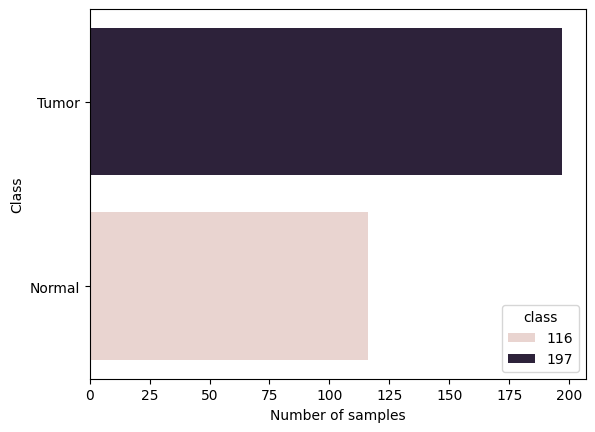

In [40]:
sns.barplot(x = "class", y = "index", data=df,hue='class')
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [41]:
lung_1_4_m = pd.melt(lung_1_4.iloc[:,1:12], id_vars = "class")


<ipython-input-42-363d6c2185b3>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


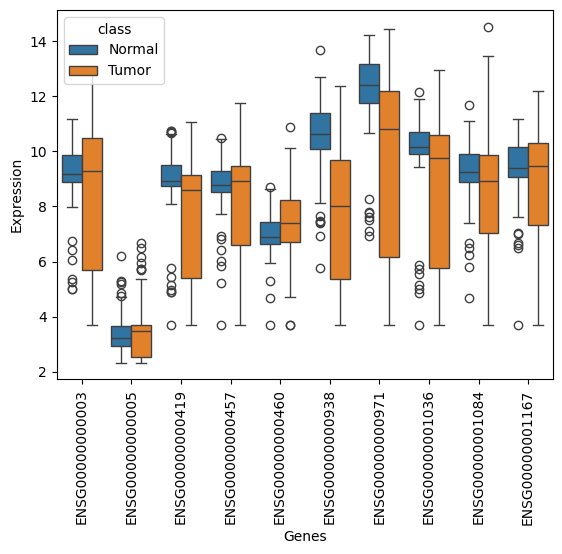

In [42]:
ax = sns.boxplot(x = "variable" , y = "value", data = lung_1_4_m, hue = "class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Genes")
plt.ylabel("Expression")
plt.show()

In [43]:
x_data=lung_1_4.drop(['class','ID'],axis=1).values

In [44]:
y_data=lung_1_4['class'].values

In [45]:
classes=lung_1_4['class'].unique().tolist()
print(classes)

['Normal', 'Tumor']


In [46]:
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype ="float32")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size=0.25, stratify = y_data)


In [48]:
model_lung1 = LogisticRegression()


In [49]:
model_lung1.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
all_pred_lung= model_lung1.predict(X_test)


In [51]:
print(model_lung1.score(X_test, y_test))


0.9620253164556962


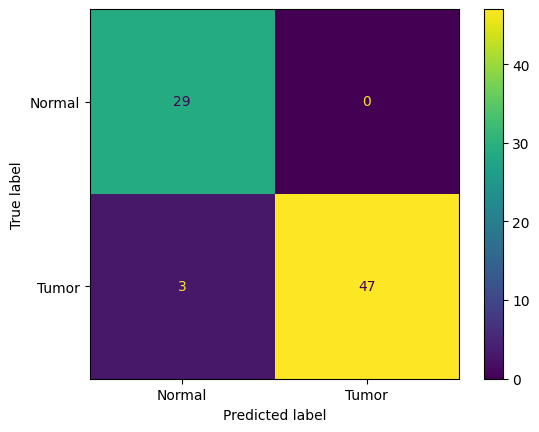

In [52]:
cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels = ["Normal", 'Tumor'])
disp.plot()
plt.show()

In [53]:
classification_report(y_test, all_pred_lung)


'              precision    recall  f1-score   support\n\n         0.0       0.91      1.00      0.95        29\n         1.0       1.00      0.94      0.97        50\n\n    accuracy                           0.96        79\n   macro avg       0.95      0.97      0.96        79\nweighted avg       0.97      0.96      0.96        79\n'

Training Accuracy: 1.0
Test Accuracy: 0.9620253164556962


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Accuracy Scores: [0.96825397 0.88888889 0.93650794 1.         0.9516129 ]
Mean CV Accuracy: 0.9490527393753201
Standard Deviation in CV Accuracy: 0.03673670093757957


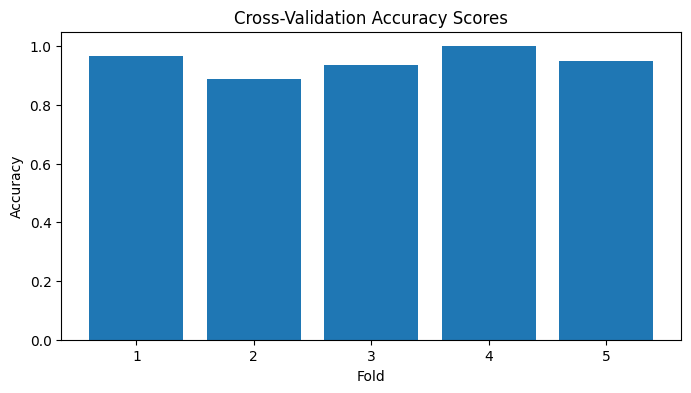

In [54]:
from sklearn.model_selection import cross_val_score

# Check performance on training set
train_accuracy = model_lung1.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Check performance on test set
test_accuracy = model_lung1.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Perform cross-validation
cv_scores = cross_val_score(model_lung1, x_data, y_data, cv=5)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")
print(f"Standard Deviation in CV Accuracy: {np.std(cv_scores)}")

# Plotting Cross-Validation Scores to visualize performance spread
plt.figure(figsize=(8, 4))
plt.title("Cross-Validation Accuracy Scores")
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, len(cv_scores) + 1))
plt.show()
